# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [23]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import Koopman
model = Koopman()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Koopmans model

Introduction:

The Koopmans model serves as a basic framework for exploring fundamental economic issues. Within the Koopmans model, we make the assumption that an economy consists of a single consumer and producer who are the same individual, along with two goods. In certain instances, it is also known as a Robinson Crusoe economy.
The underlying presumption is that analyzing a one-agent economy will yield valuable insights into the operations of a real-world economy comprising numerous economic agents.


  

We begin by describing a scenario in which a Koopmans model could be applied:

Dwight, a former pilot and KGB agent from the Soviet Union, has transitioned to a livelihood as a freelance airplane photographer following the collapse of the Soviet Union. Over time, he has become a highly regarded photographer specializing in deserted island photography. Dwight was enjoying a state of great happiness, but it would soon take a turn for the worse... One day while flying over the uninhabited island known as Beets Island, Dwight encountered an engine malfunction and had to perform an emergency landing. Fortunately for Dwight, Beets Island lives up to its name. Upon finding 1200 beets, Dwight swiftly realizes that he can use them to successfully catch fish. If Dwight consumes all the beets, he won't be able to catch any fish. However, for each beet he uses, he will catch fish corresponding to the square root of the quantity of beets used for fishing. This is all the background we need to set up a Koopmans model.

Below we have described the various parameters and the model:

y  is the quantity of fish caught

z  is the quantity of beets

e1 is the initial amount of beets

e2 is the initial amount of fish

x1 is the preference for beets

x2 is the preference for fish

p1 is the price of beets

p2 is the price of fish

a  is the consumer's preference

i  is the income

pi is the profit

In [24]:
y = sm.symbols('y') 
z = sm.symbols('z') 
e1 = sm.symbols('e_1') 
e2 = sm.symbols('e_2') 
x1 = sm.symbols('x_1') 
x2 = sm.symbols('x_2') 
p1 = sm.symbols('p_1') 
p2 = sm.symbols('p_2') 
a = sm.symbols('alpha') 
i = sm.symbols('I') 
pi = sm.symbols('pi')

HUSK BESKRIV ALGORITME

In [25]:
# Define production function:

y = z**(1/2)
y

z**0.5

# Walras equilibrium

In [26]:
# Setting parameters
a = 0.5 #np.linspace(0,1,10)
e1 = 1200
e2 = 0
p2 = 1

In [27]:
# Possible consumption plan
x1 = e1 - z
x2 = e2 + y

In [28]:
# Define consumer preferences:
def u(x1,x2,a):
    return x1**a * x2**(1-a)

In [29]:

# Price 1
p1 = ((1+a)/(4800*(1-a)))**(1/2)


In [30]:
# Profit
pi = 1/(4*p1)

# Consumption plan
# m = p1*e1+p2*e2+pi
m = (4800*p1**2+1)/(4*p1)

# Equilibrium
z_e = 1/(4*(p1**2))
y_e = z_e**0.5
print(z_e)
print(y_e)

399.99999999999994
20.0


In [31]:
z = np.array(range(e1+e2))
#z = np.linspace(0,(e1+e2), num=1000, endpoint=True)


In [32]:
Productionfunction: y = z**(1/2)
Isoprofit: y = p1 * z + pi
Utility: y = ((e1**a)/((e1-z)**a)**(a-1))-e2

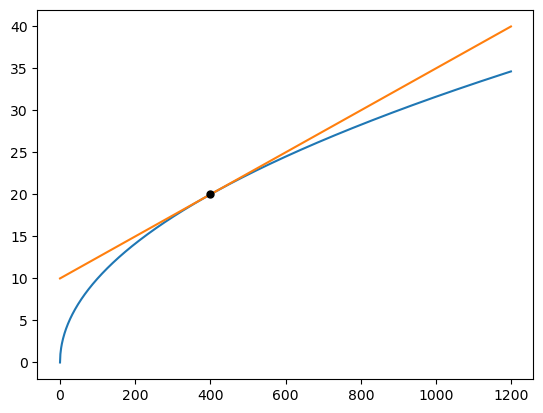

In [33]:
plt.plot(Productionfunction)
plt.plot(Isoprofit)
#plt.plot(Utility)
plt.plot(z_e,y_e, marker="o", markersize=5, markerfacecolor="black", markeredgecolor="black")
plt.show()

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 